In [14]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Download the dataset from the URL
url = "https://raw.githubusercontent.com/jparisu/CUNEF-ML-Resources/main/datasets/imdb/imdb.csv"
url = "imdb.csv"  # In case the dataset is locally stored
df = pd.read_csv(url)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


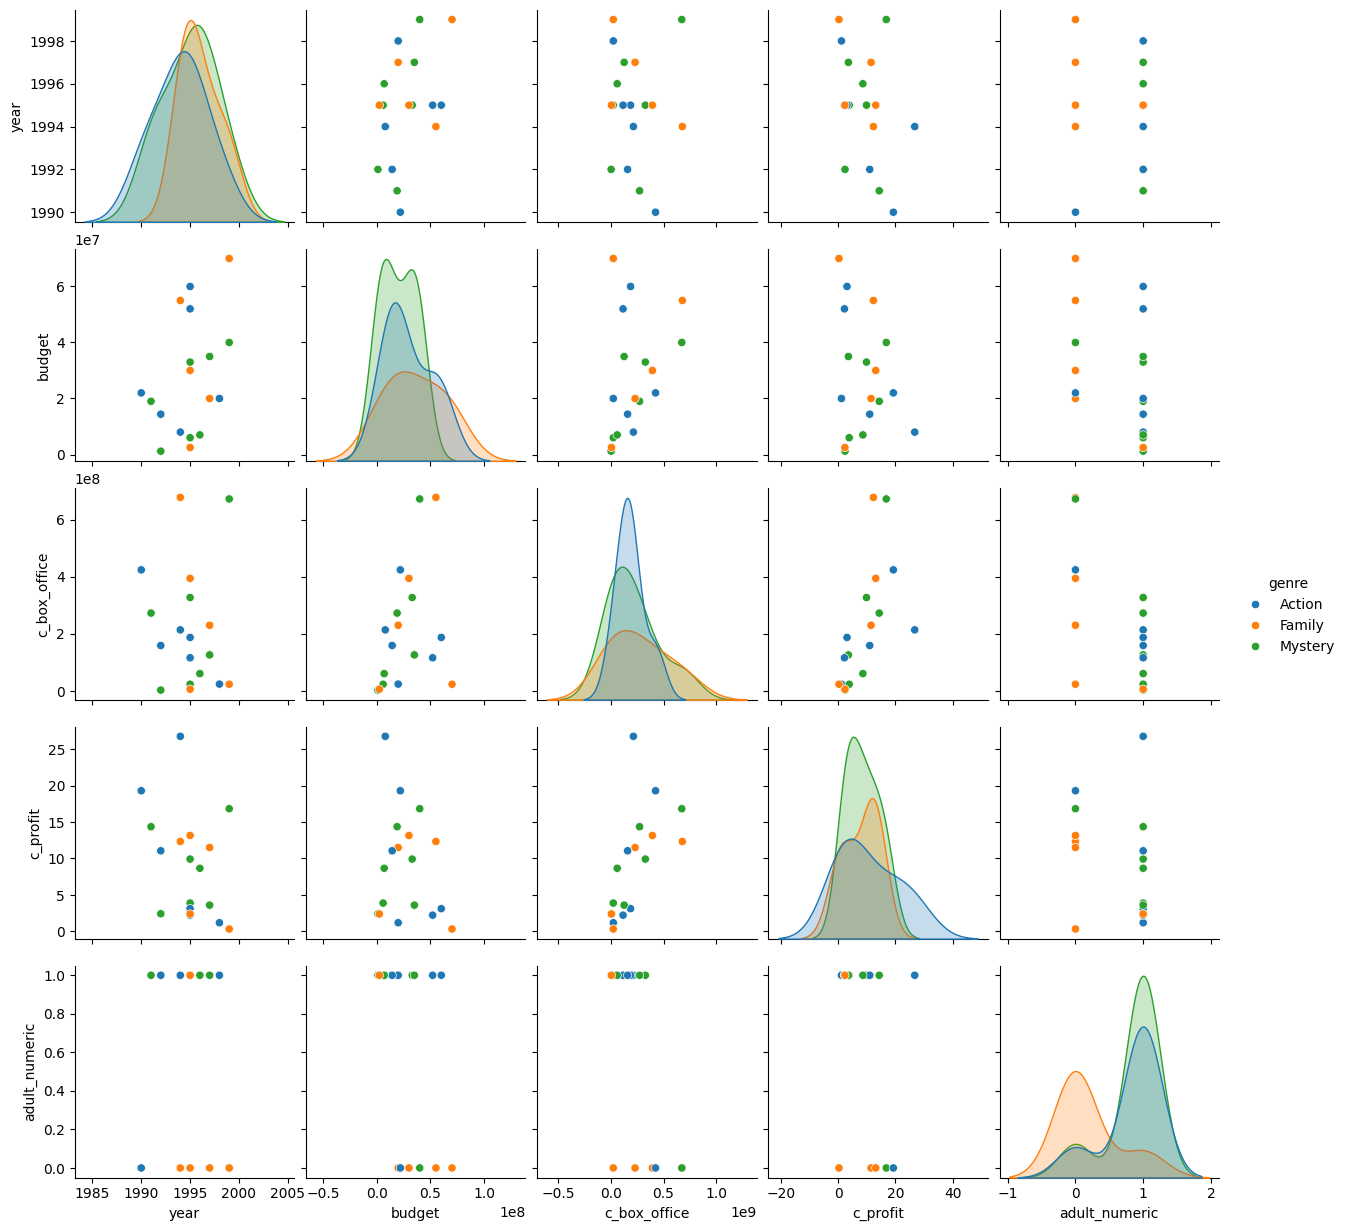

In [16]:
# Plot the data (convert the 'adult' column to numeric)
df['adult_numeric'] = df['adult'].map({'yes': 1, 'no': 0})
sns.pairplot(df, hue='genre')

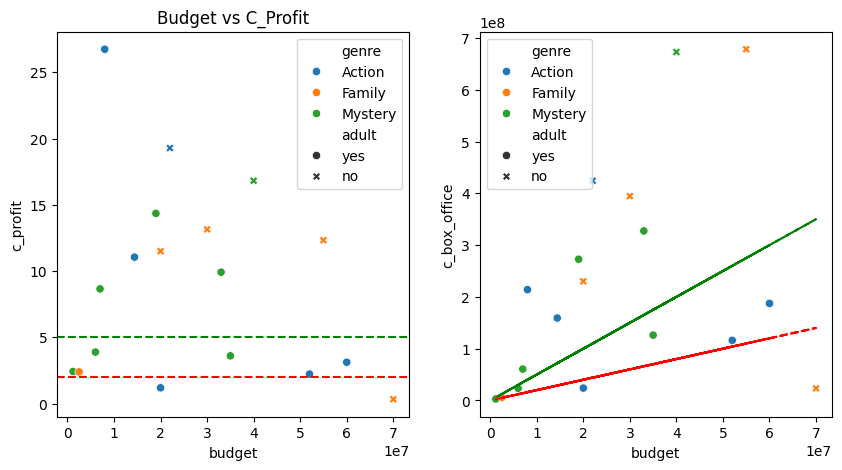

In [17]:
# 2 plots in horizontal layout
# First with the budget vs c_profit
# Second with the budget vs c_box_office

# First plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='budget', y='c_profit', hue='genre', style='adult')
plt.title('Budget vs C_Profit')
# Add horizontal line in profit = 1
plt.axhline(y=2, color='red', linestyle='--')
plt.axhline(y=5, color='green', linestyle='--')

# Second plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='budget', y='c_box_office', hue='genre', style='adult')
# Add diagonal lines
plt.plot(df['budget'], 2*df['budget'], color='red', linestyle='--')
plt.plot(df['budget'], 5*df['budget'], color='green', linestyle='--')

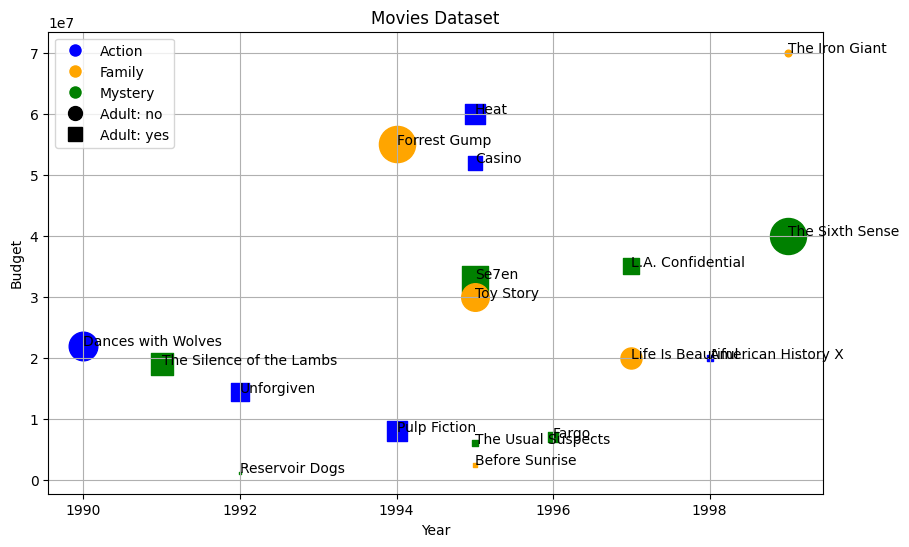

In [18]:
# Plot the whole dataset
# X axis - year
# Y axis - budget
# Color - genre
# Figure (o/x) - adult
# Size - box_office
# Add the name to each point

# Get unique genres
genres = df['genre'].unique()

# Define the colors and figures
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
color_x_genre = {genre: colors[i] for i, genre in enumerate(genres)}
figures = {'no': 'o', 'yes': 's'}

# Create the plot
plt.figure(figsize=(10, 6))

for i, row in df.iterrows():
    plt.scatter(row['year'], row['budget'],
                color=color_x_genre[row['genre']],
                marker=figures[row['adult']],
                s=row['c_box_office'] / 1000000, # Scale down the size for better visualization
                label=row['name'])
    plt.text(row['year'], row['budget'], row['name'])

# Create legend for genres
genre_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=genre)
                 for genre, color in color_x_genre.items()]

# Create legend for adult
adult_handles = [plt.Line2D([0], [0], marker=marker, color='k', linestyle='None', markersize=10, label=f'Adult: {adult}')
                 for adult, marker in figures.items()]

# Combine legends
handles = genre_handles + adult_handles
plt.legend(handles=handles)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Budget')
plt.title('Movies Dataset')
plt.grid(True)
plt.show()

<Axes: >

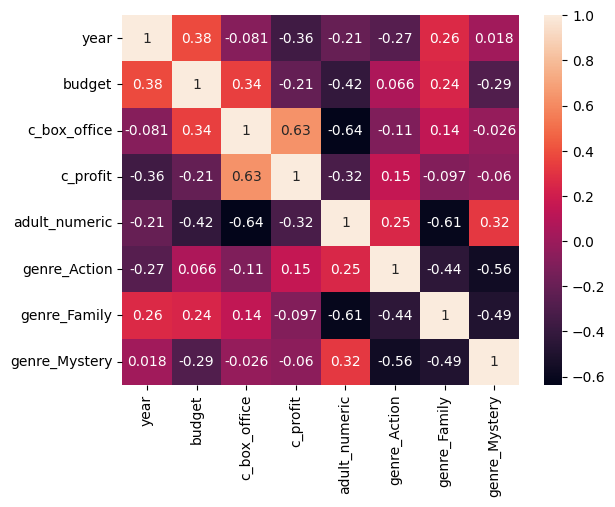

In [19]:
# Convert genre with one-hot encoding
df_num = df[['year', 'budget', 'c_box_office', 'c_profit', 'adult_numeric', 'genre']]
df_num = pd.get_dummies(df_num, columns=['genre'], drop_first=False)

# See correlation matrix of numeric columns
corr = df_num.corr()
sns.heatmap(corr, annot=True)